In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [134]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.shape #1460,81

(1460, 81)

In [135]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [136]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [137]:
miss_val = train.isnull().sum()[train.isnull().sum() != 0]  #missing values
print(miss_val)

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


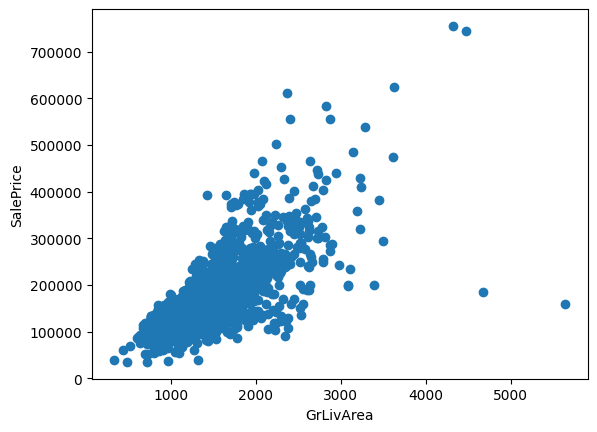

In [138]:
plt.scatter(train['GrLivArea'], train['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

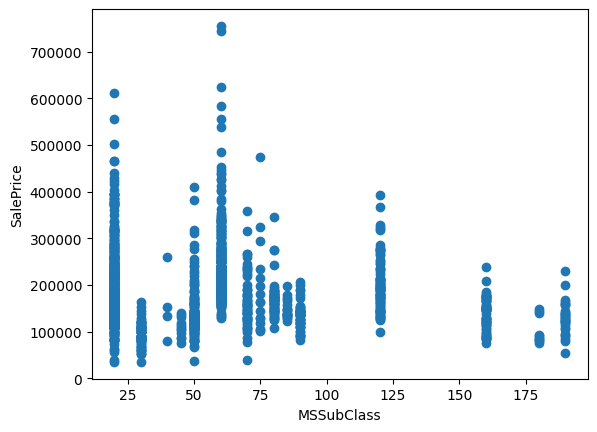

In [139]:
plt.scatter(train["MSSubClass"], train["SalePrice"])
plt.xlabel('MSSubClass')
plt.ylabel('SalePrice')
plt.show()

<Axes: >

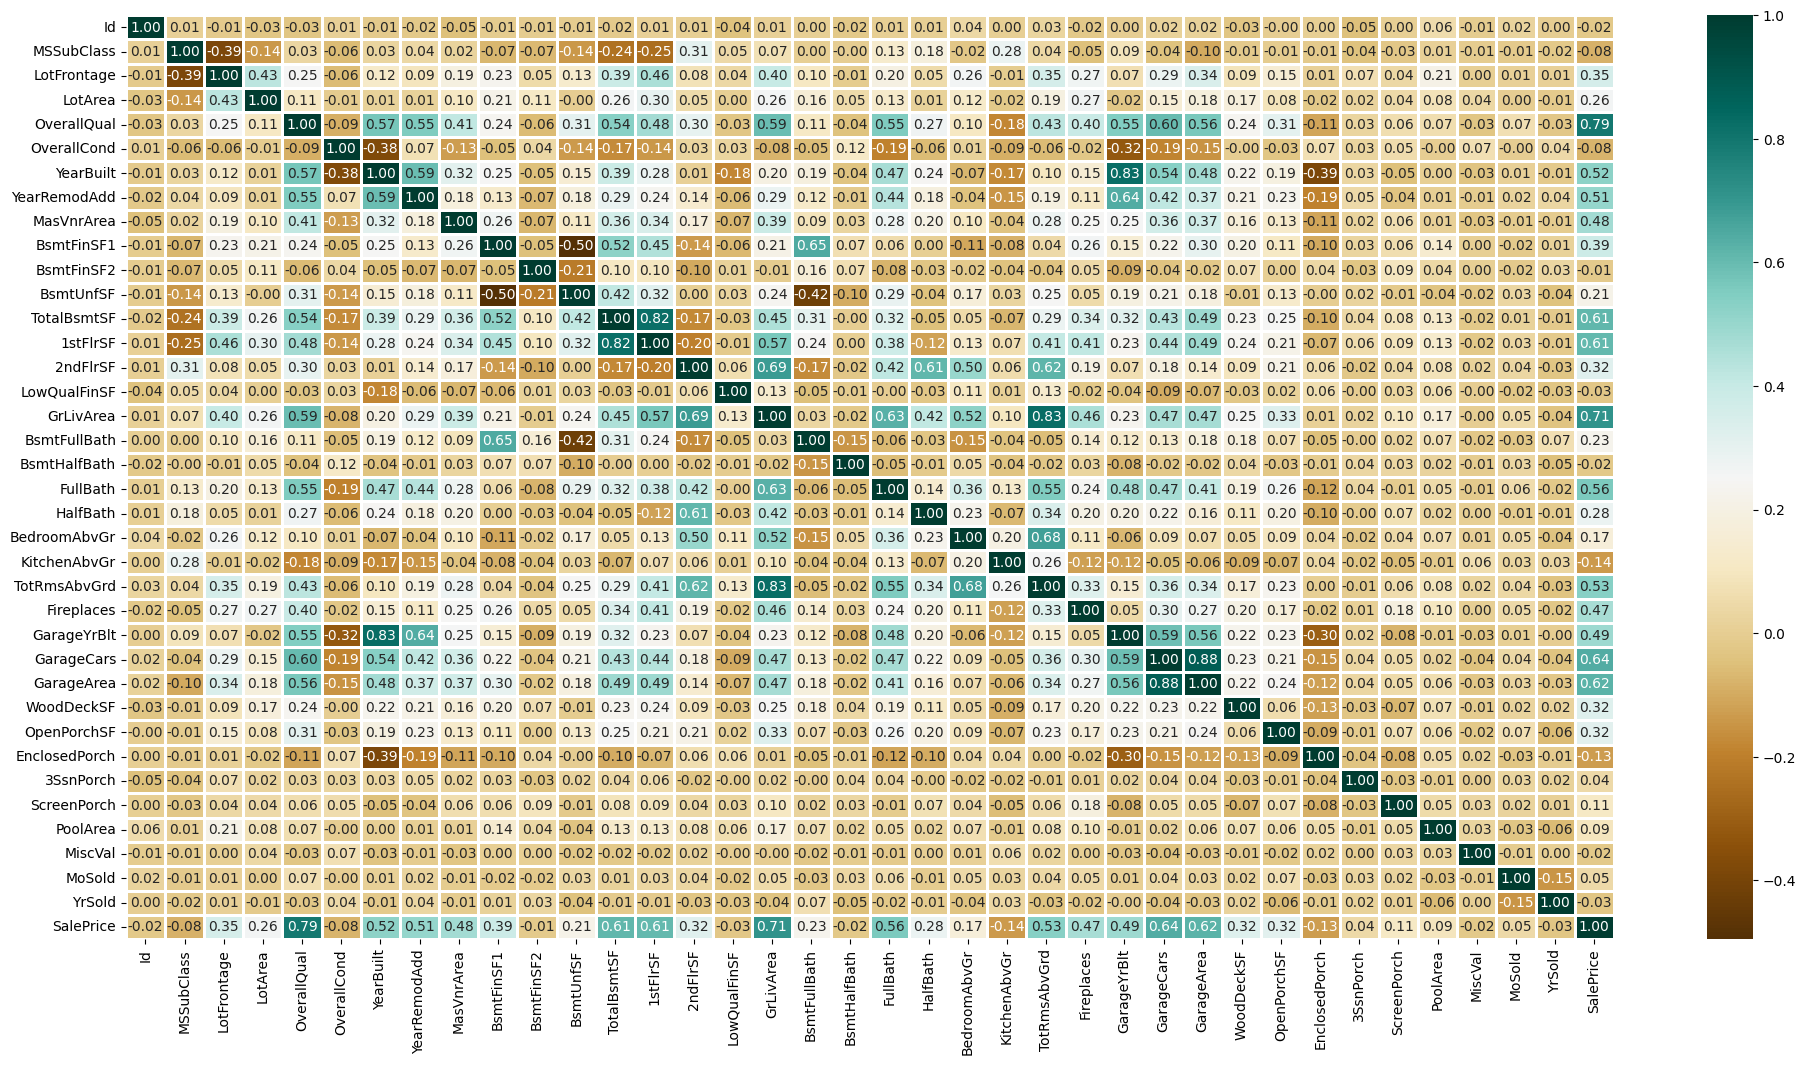

In [140]:
# Select only numerical features for correlation analysis
x_var = train.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(24, 12))
sns.heatmap(x_var.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

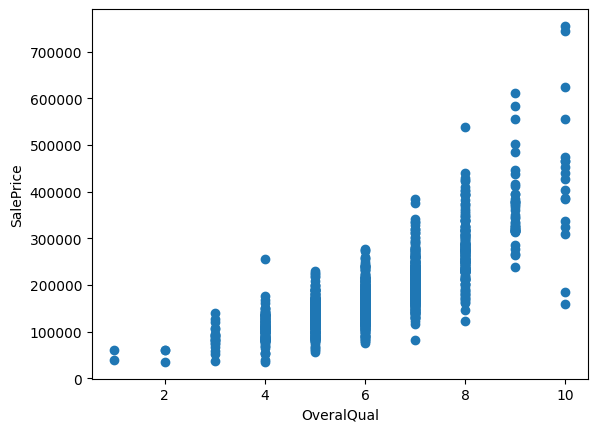

In [141]:
plt.scatter(train["OverallQual"], train["SalePrice"])
plt.xlabel('OveralQual')
plt.ylabel('SalePrice')
plt.show()

In [142]:
fill_values = {}
for col in train.columns:
    if train[col].dtype in ['int64', 'float64']:
        fill_values[col] = train[col].mean()
    elif train[col].dtype == 'object':
        fill_values[col] = 'missing'

In [143]:
df_train = train.fillna(fill_values)
df_test = test.fillna(fill_values)

print(df_train.isnull().sum())
print(df_test.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64


In [144]:
from sklearn.preprocessing import LabelEncoder

df_combined = pd.concat([df_train, df_test], axis=0)

#onvert all categorical columns to string type to avoid mixed data types
for col in df_combined.select_dtypes(include='object').columns:
    df_combined[col] = df_combined[col].astype(str)

#Apply label encoding on the combined dataset
label_encoders = {}
for col in df_combined.select_dtypes(include='object').columns:
    le = LabelEncoder()
    
    # Fit the encoder on the combined dataset
    df_combined[col] = le.fit_transform(df_combined[col])
    
    # Store the label encoder for later use
    label_encoders[col] = le

#Separate the datasets back
df_train_encoded = df_combined[:len(df_train)]
df_test_encoded = df_combined[len(df_train):]

In [145]:
df_test_encoded=df_test_encoded.drop('SalePrice', axis=1)
print(df_test_encoded.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [146]:
from sklearn.model_selection import train_test_split

X= df_train_encoded.drop('SalePrice', axis=1) 
y = df_train_encoded['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [147]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Define models and parameters for hyperparameter tuning
models_and_params = {
    "Decision Tree": {
        "model": DecisionTreeRegressor(),
        "params": {
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    "Random Forest": {
        "model": RandomForestRegressor(random_state=42),
        "params": {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    "Linear Regression": {
        "model": LinearRegression(),
        "params": {}  # No hyperparameters to tune for Linear Regression
    }
}

# Loop through models for hyperparameter tuning
best_estimators = {}
results = []

for model_name, model_info in models_and_params.items():
    print(f"Tuning {model_name}...")
    
    # Initialize RandomizedSearchCV (Linear Regression doesn't need hyperparameter tuning)
    if model_name != "Linear Regression":
        search = RandomizedSearchCV(
            estimator=model_info["model"],
            param_distributions=model_info["params"],
            scoring='neg_mean_squared_error',
            cv=5,
            n_iter=10,
            random_state=42,
            n_jobs=-1
        )
        search.fit(X_train, y_train)
        best_estimator = search.best_estimator_
        best_params = search.best_params_
    else:
        # For Linear Regression, fit the model
        best_estimator = model_info["model"]
        best_estimator.fit(X_train, y_train)  # Fit the model here
        best_params = {}

    # Evaluate on the test set
    y_pred = best_estimator.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results.append({
        "Model": model_name,
        "Best Parameters": best_params,
        "MSE": mse,
        "R² Score": r2
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display results
print(results_df)

Tuning Decision Tree...


Tuning Random Forest...
Tuning Linear Regression...
               Model                                    Best Parameters  \
0      Decision Tree  {'min_samples_split': 5, 'min_samples_leaf': 2...   
1      Random Forest  {'n_estimators': 300, 'min_samples_split': 2, ...   
2  Linear Regression                                                 {}   

            MSE  R² Score  
0  1.444127e+09  0.811725  
1  8.325100e+08  0.891464  
2  1.196111e+09  0.844060  


In [148]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=300, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred  
})

results.to_csv('predictions.csv', index=False)

In [150]:
from sklearn.metrics import r2_score

results = pd.read_csv('predictions.csv')

y_true = results['Actual']
y_pred = results['Predicted']

r2 = r2_score(y_true, y_pred)
print(f"R2 Score: {r2}")

R2 Score: 0.8914635500297351
